In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [4]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [5]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [6]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [7]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [8]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [10]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 250, 250, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,541,134 (85.99 MB)

 Trainable params: 22,541,128 (85.99 MB)

 Non-trainable params: 6 (24.00 B)

In [13]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [14]:
## lets train our CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4846 - loss: 4.8902
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4849 - loss: 4.7039 - val_accuracy: 0.5306 - val_loss: 0.6898
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5316 - loss: 0.6897
Epoch 2: val_accuracy improved from 0.53061 to 0.60204, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5342 - loss: 0.6895 - val_accuracy: 0.6020 - val_loss: 0.6771
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6201 - loss: 0.6619
Epoch 3: val_accuracy did not improve from 0.60204
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6181 - loss: 0.6617 - val_accuracy: 0.5918 - val_loss: 0.6770
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6151 - loss: 0.6323
Epoch 4: val_accuracy did not improve from 0.60204
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6175 - loss: 0.6314 - val_accuracy: 0.5714 - val_loss: 0.6567
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6533 - loss: 0.6036
Epoch 5: val_accuracy improved from 0.60204 to 0.62245, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6554 - loss: 0.6026 - val_accuracy: 0.6224 - val_loss: 0.6341
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6879 - loss: 0.5601
Epoch 6: val_accuracy improved from 0.62245 to 0.68367, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6916 - loss: 0.5581 - val_accuracy: 0.6837 - val_loss: 0.5962
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7115 - loss: 0.5222
Epoch 7: val_accuracy improved from 0.68367 to 0.76531, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7154 - loss: 0.5198 - val_accuracy: 0.7653 - val_loss: 0.5441
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7831 - loss: 0.4557
Epoch 8: val_accuracy did not improve from 0.76531
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7851 - loss: 0.4534 - val_accuracy: 0.7449 - val_loss: 0.5997
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8118 - loss: 0.4090
Epoch 9: val_accuracy did not improve from 0.76531
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8142 - loss: 0.4062 - val_accuracy: 0.7347 - val_loss: 0.5692
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8567 - loss: 0.3234
Epoch 10: val_accuracy did not improve from 0.76531
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8573 - loss: 0.3222 - val_accuracy: 0.7347 - val_loss: 0.6774
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9001 - loss: 0.2512
Epoch 11: val_accuracy improved from 0.76531 to 0.79592, saving mode

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9012 - loss: 0.2497 - val_accuracy: 0.7959 - val_loss: 0.7913
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9305 - loss: 0.1954
Epoch 12: val_accuracy improved from 0.79592 to 0.80612, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9307 - loss: 0.1944 - val_accuracy: 0.8061 - val_loss: 0.8658
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9276 - loss: 0.1810
Epoch 13: val_accuracy did not improve from 0.80612
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9273 - loss: 0.1809 - val_accuracy: 0.7653 - val_loss: 0.9363
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9055 - loss: 0.2141
Epoch 14: val_accuracy improved from 0.80612 to 0.82653, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9070 - loss: 0.2108 - val_accuracy: 0.8265 - val_loss: 0.5407
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9473 - loss: 0.1471
Epoch 15: val_accuracy did not improve from 0.82653
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9475 - loss: 0.1461 - val_accuracy: 0.8061 - val_loss: 0.8407
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9624 - loss: 0.1066
Epoch 16: val_accuracy improved from 0.82653 to 0.85714, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9627 - loss: 0.1060 - val_accuracy: 0.8571 - val_loss: 0.5632
Epoch 17/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9697 - loss: 0.0940
Epoch 17: val_accuracy improved from 0.85714 to 0.86735, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9692 - loss: 0.0947 - val_accuracy: 0.8673 - val_loss: 0.5149
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9699 - loss: 0.1039
Epoch 18: val_accuracy did not improve from 0.86735
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9698 - loss: 0.1016 - val_accuracy: 0.8673 - val_loss: 0.5037
Epoch 19/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9718 - loss: 0.0731
Epoch 19: val_accuracy improved from 0.86735 to 0.87755, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9719 - loss: 0.0731 - val_accuracy: 0.8776 - val_loss: 0.5469
Epoch 20/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9754 - loss: 0.0767
Epoch 20: val_accuracy did not improve from 0.87755
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9754 - loss: 0.0759 - val_accuracy: 0.8673 - val_loss: 0.4333


In [15]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

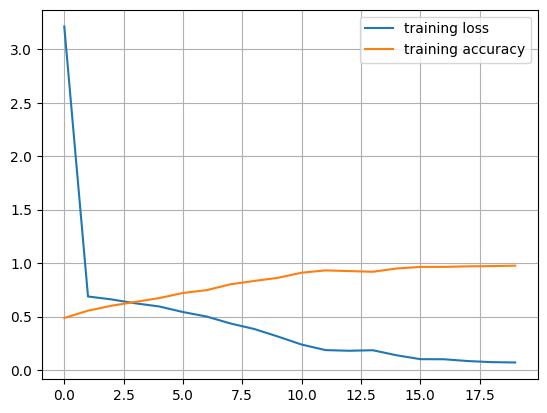

In [16]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

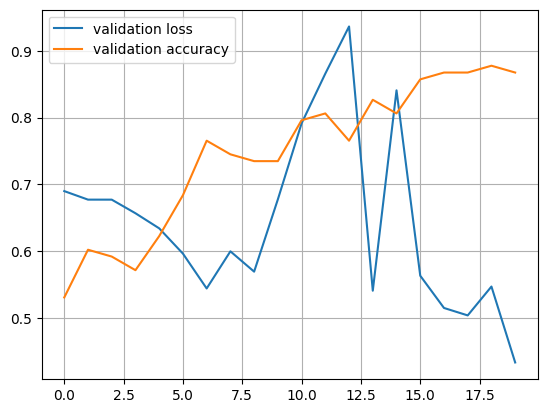

In [17]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


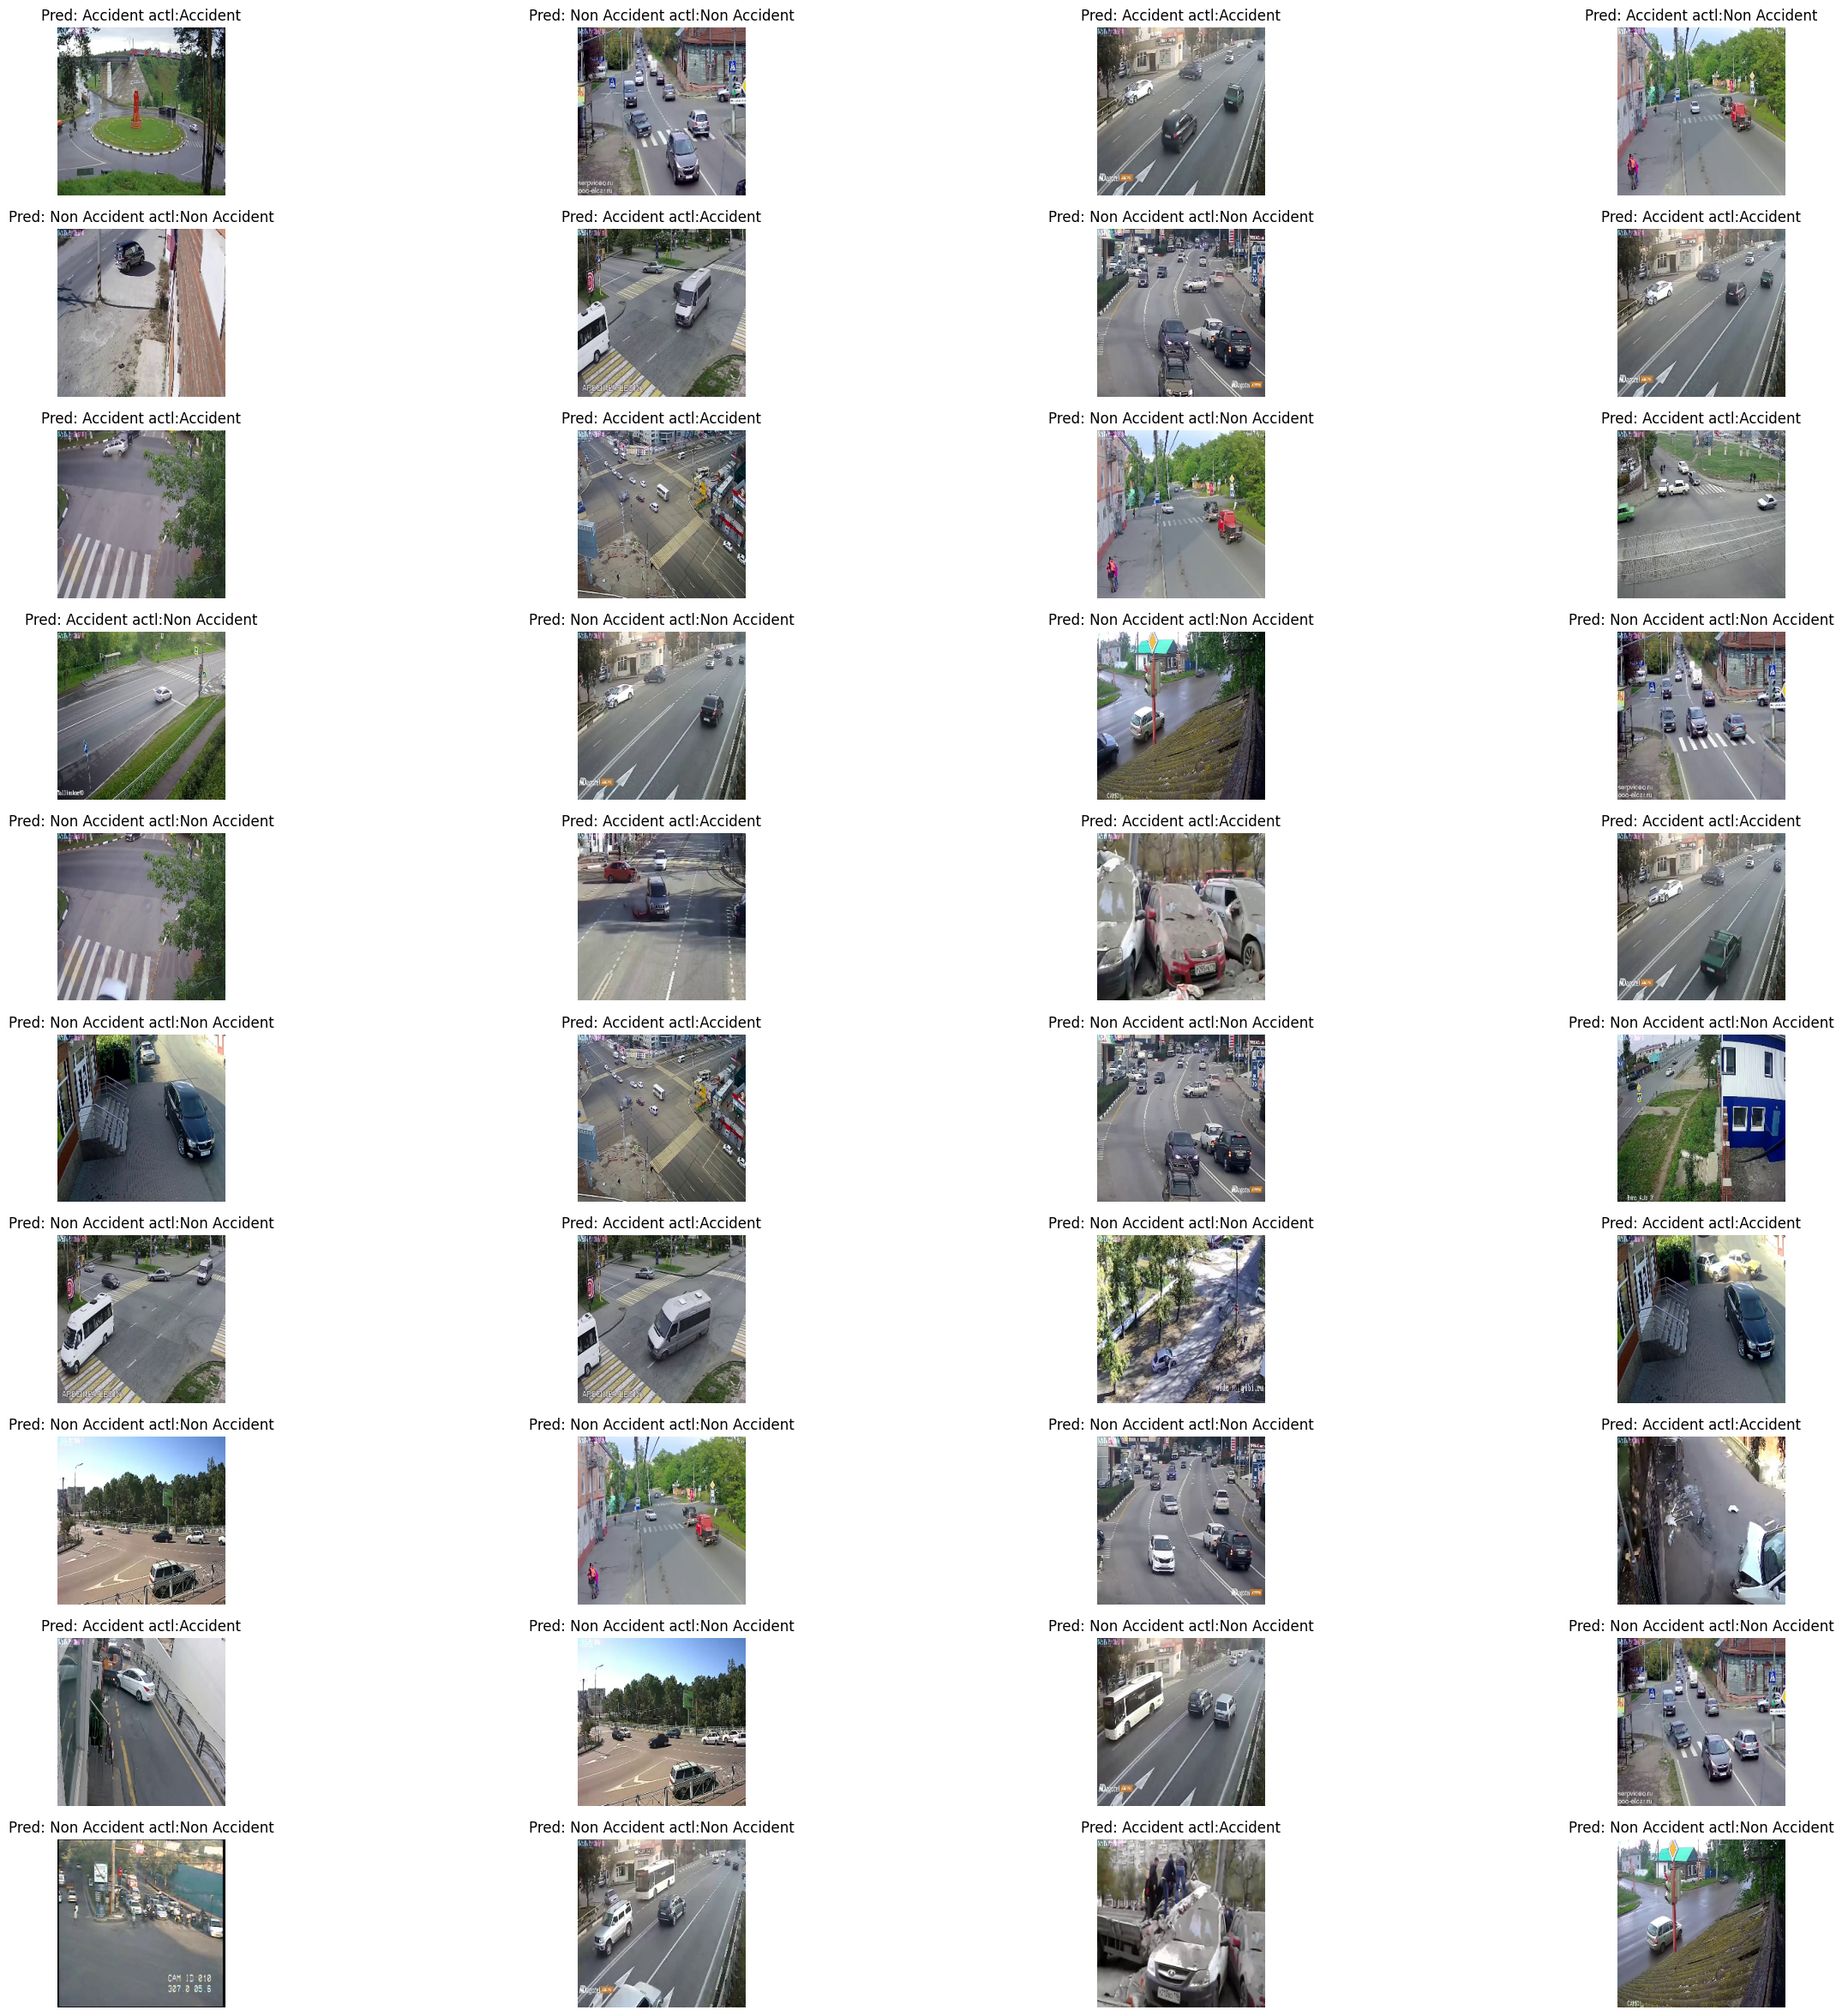

In [18]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)